In [1]:
%pylab inline
#plt.style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from TX import cmb, upf
import subprocess

** joblib was not found - will not be used in TX.upf


In [3]:
odf='/Users/youngung/repo/mymtex_analysis/mooyeong/eddq.odf'

max values 360.0  90.0  90.0
maximum angles along each axis
phi1: 360.00
phi2:  90.00
phi :  90.00
minimum angles along each axis
phi1:   0.00
phi2:   0.00
phi :   0.00
ssym: None ngrain= 20000
phi1, phi, phi2 360.0 90.0 90.0
Elapsed time for calling cells_pf:           4 [sec]CPU times: user 5.15 s, sys: 63.3 ms, total: 5.21 s
Wall time: 5.21 s


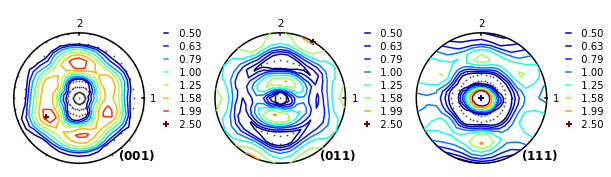

In [12]:
%%time
myrve=cmb.RVE(fmt='mtex',ngrain=20000,
              cmbfile='/tmp/dum.tex',
              odf=odf)
mypf=upf.polefigure(filename='/tmp/dum.tex',csym='cubic',)
kwargs=dict(poles=[[0,0,1],[0,1,1],[1,1,1]],mode='line',
            cmap='jet',mn=0.5,mx=2.5)
fig=mypf.pf_new(**kwargs)




 B       20000
  0.16298E+03  0.62378E+02  0.80836E+02  0.59518E+00
  0.11808E+03  0.58615E+02  0.80994E+02  0.70549E+00
  0.34488E+03  0.86207E+02  0.48676E+02  0.25710E+00
  0.15727E+03  0.68808E+02  0.51592E+02  0.22508E+01
  0.29850E+03  0.68776E+02  0.85744E+01  0.11368E+00
  0.32946E+03  0.54463E+02  0.26457E+02  0.16164E+01
Elapsed time for calling cells_pf:           4 [sec]CPU times: user 4.29 s, sys: 171 ms, total: 4.46 s
Wall time: 4.86 s


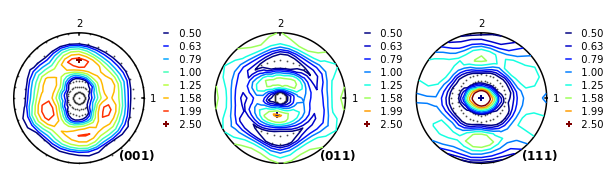

In [13]:
%%time
!cp ../src/cmb.f cmb.f&&gfortran cmb.f -o cmb&&./cmb {odf} dum &&head dum
mypf=upf.polefigure(filename='dum',csym='cubic')
fig=mypf.pf_new(**kwargs)




 B       20000
  0.33624E+03  0.89500E+02  0.65331E+02  0.36714E+00
  0.25949E+03  0.83657E+02  0.70120E+02  0.13710E+00
  0.29072E+03  0.75763E+02  0.55658E+02  0.18163E+01
  0.44064E+02  0.42370E+02  0.24172E+02  0.47899E+00
  0.16550E+03  0.80418E+02  0.47020E+02  0.32889E+00
  0.25211E+03  0.59566E+02  0.10142E+02  0.68183E+00
Elapsed time for calling cells_pf:           4 [sec]CPU times: user 4.18 s, sys: 143 ms, total: 4.33 s
Wall time: 4.81 s


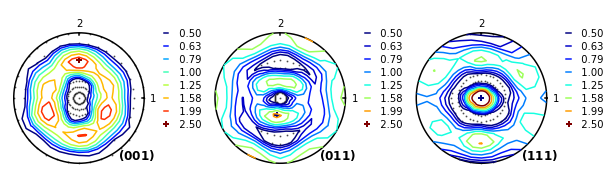

In [14]:
%%time
!cp ../src/cmb.f cmb.f&&gfortran cmb.f -o cmb&&./cmb {odf} dum&&head dum
mypf=upf.polefigure(filename='dum',csym='cubic')
fig=mypf.pf_new(**kwargs)




 B       20000
  0.27105E+03  0.25506E+02  0.17880E+02  0.63909E+00
  0.33286E+03  0.82370E+02  0.36543E+02  0.19997E+00
  0.86212E+02  0.86875E+02  0.70445E+02  0.14783E+00
  0.27631E+03  0.49841E+02  0.18535E+02  0.10710E+01
  0.29951E+02  0.73966E+02  0.91973E-01  0.33736E+00
  0.25734E+03  0.66045E+02  0.11322E+02  0.63759E+00
Elapsed time for calling cells_pf:           4 [sec]CPU times: user 4.2 s, sys: 93.5 ms, total: 4.3 s
Wall time: 4.74 s


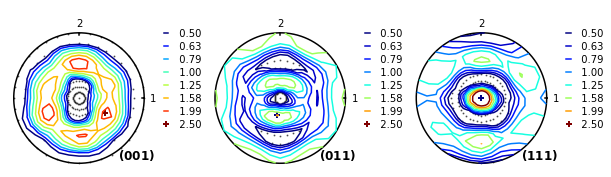

In [15]:
%%time
!cp ../src/cmb.f cmb.f&&gfortran cmb.f -o cmb&&./cmb {odf} dum&&head dum
mypf=upf.polefigure(filename='dum',csym='cubic')
fig=mypf.pf_new(**kwargs)

***  number of grain: 59920  ***
Total volume: 19964.4
max:  90.0 90.0 90.0
min:  0.0 0.0 0.0
FULL INTEGRATION VALUE: 0.2 * pi * pi
section at phi2 = 45.0
rdi: 0.137078
x: 0.0 ~ 90.0
y: 0.0 ~ 90.0
z: 0.0 ~ 90.0
nnx, nny, and f.shape 18 18 (18, 18)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


levels:  [0. 1. 2. 3. 4. 5. 6. 7. 8.]


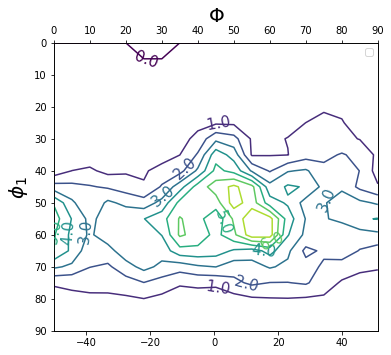

In [19]:
from MP import read_blocks
from TX import cod_section
read_blocks.read_tx
#fn='/Users/youngung/repo/evpsc/TEX_PH1.OUT'
pxs,ngrs=read_blocks.read_tx('dum')
_dummy_results_=cod_section.main(resolution=5.,gr=pxs[-1,:,:].T,phi2=45.)